In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [5]:
for dirpath, _, _ in os.walk('/kaggle/input/bone-fracture-dataset/BoneFractureDataset'):
    print(dirpath)

/kaggle/input/bone-fracture-dataset/BoneFractureDataset
/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training
/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training/not_fractured
/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training/fractured
/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing
/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing/not_fractured
/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing/fractured


In [6]:
# Paths
base_path = "/kaggle/input/bone-fracture-dataset/BoneFractureDataset"

# Class directories
train_fractured = os.path.join(base_path, "training", "fractured")
train_not_fractured = os.path.join(base_path, "training", "not_fractured")
test_fractured = os.path.join(base_path, "testing", "fractured")
test_not_fractured = os.path.join(base_path, "testing", "not_fractured")

# Count images
counts = {
    "Training - Fractured": len(os.listdir(train_fractured)),
    "Training - Not Fractured": len(os.listdir(train_not_fractured)),
    "Testing - Fractured": len(os.listdir(test_fractured)),
    "Testing - Not Fractured": len(os.listdir(test_not_fractured))
}


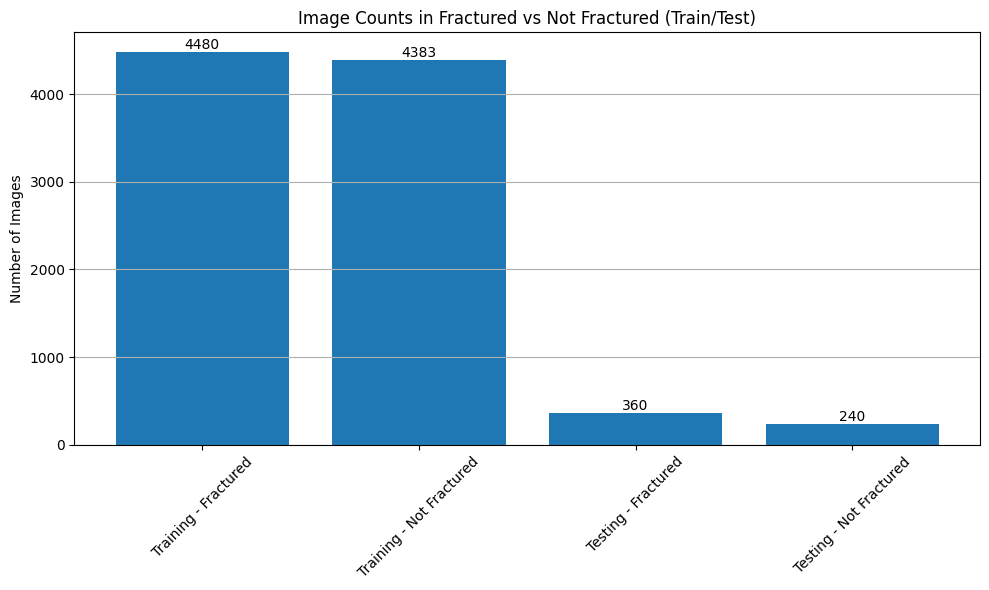

In [7]:
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.keys(), counts.values())
plt.ylabel("Number of Images")
plt.title("Image Counts in Fractured vs Not Fractured (Train/Test)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Annotate values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position
        height,                             # y-position
        f'{int(height)}',                   # text
        ha='center', va='bottom', fontsize=10
    )

plt.show()

Dataset is balanced.


## Preprocess the Images

Split into:
Train (70%)
Validation (15%)
Test (15%)

In [8]:
# Step 1: Set image size and batch size
IMG_SIZE = (224, 224)   #Use a fixed size like 224x224 for consistency.
BATCH_SIZE = 32

# Step 2: Load training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training",                    # path to training directory
    image_size=IMG_SIZE,               # resize all images
    batch_size=BATCH_SIZE,            
    label_mode="binary",               # use "categorical" for multi-class
    validation_split=0.15,              # 15% of training data for validation
    subset="training",                  # training subset
    seed=123,                           # fixed seed for reproducibility
    shuffle=True                       # shuffle for training
)

# Step 3: Load test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

# Step 4: Validation DataSet
val_dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    validation_split=0.15,              # same split as above
    subset="validation",                # validation subset
    seed=123
)

# Step 5: Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


2025-08-09 14:15:51.907014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754748951.933641     150 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754748951.941400     150 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8863 files belonging to 2 classes.
Using 7534 files for training.
Found 600 files belonging to 2 classes.


2025-08-09 14:15:57.103750: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 8863 files belonging to 2 classes.
Using 1329 files for validation.


In [9]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Optional, helps reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.6119 - loss: 0.6861 - val_accuracy: 0.7795 - val_loss: 0.4733
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.7860 - loss: 0.4347 - val_accuracy: 0.9255 - val_loss: 0.2048
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.8949 - loss: 0.2373 - val_accuracy: 0.9556 - val_loss: 0.1198
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.9372 - loss: 0.1607 - val_accuracy: 0.9571 - val_loss: 0.1113
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.9511 - loss: 0.1208 - val_accuracy: 0.9729 - val_loss: 0.0748
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.9645 - loss: 0.0865 - val_accuracy: 0.9533 - val_loss: 0.1396
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.9681 - loss: 0.0823 - val_accuracy: 0.9797 - val_loss: 0.0898
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.9650 - loss: 0.0756 - val_accu

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 465ms/step - accuracy: 0.9751 - loss: 0.0780
Test Accuracy: 0.9781790971755981


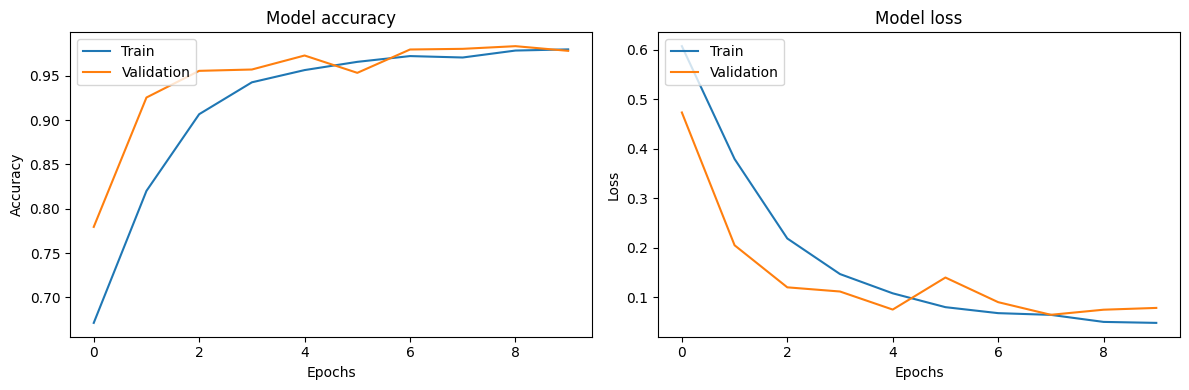

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
model.save('fracture_model.h5')
# loaded_model = tf.keras.models.load_model('fracture_model.h5')